In [ ]:
#Install the dependencies
import math
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [ ]:
#Load the data
from google.colab import files
uploaded=files.upload()

In [ ]:
#store the data into a data frame
df=pd.read_csv('tesla.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,07-07-2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700


In [ ]:
#Get the number of trading days
df.shape

(2193, 7)

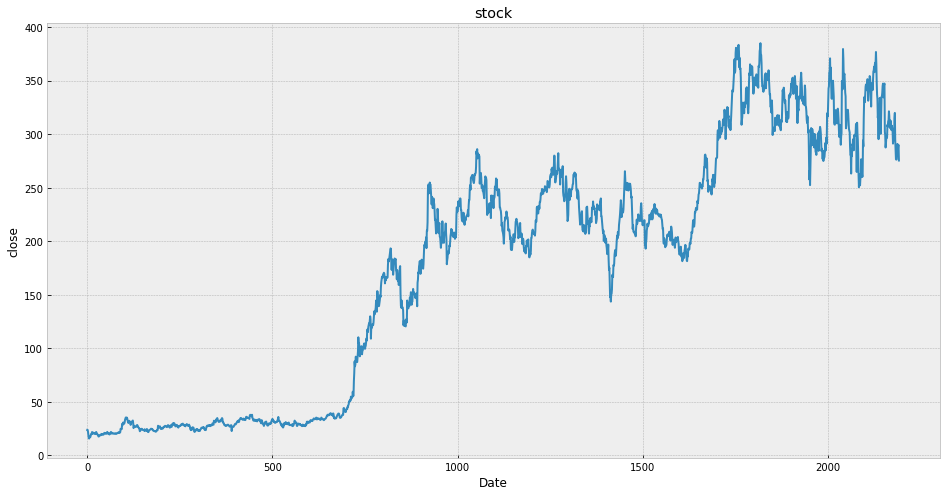

In [ ]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('stock')
plt.xlabel('Date')
plt.ylabel('close')
plt.plot(df['Close'])
plt.show()

In [ ]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [ ]:
future_days = 25
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4) 

,Close,Prediction
2189,283.359985,NaN
2190,288.959991,NaN
2191,289.959991,NaN
2192,275.429993,NaN


In [ ]:
#create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [321.350006]
 [317.220001]
 [307.51001 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
y = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(y)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [321.350006]
 [317.220001]
 [307.51001 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
#split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
#create the models
#create the decision tree regression model
tree = DecisionTreeRegressor().fit(X_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
#get the lasst 'x' rows of future  data set
x_future = df.drop(['Prediction'], 1)[1:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[300.359985],
       [317.690002],
       [334.959991],
       [335.350006],
       [338.529999],
       [344.970001],
       [347.26001 ],
       [334.399994],
       [344.429993],
       [346.049988],
       [347.309998],
       [302.26001 ],
       [298.920013],
       [287.589996],
       [291.51001 ],
       [297.040009],
       [296.380005],
       [297.459991],
       [308.769989],
       [307.019989],
       [312.209991],
       [312.890015],
       [321.350006],
       [317.220001],
       [307.51001 ]])

In [ ]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[300.339996 317.690002 334.959991 335.450012 338.690002 344.970001
 347.309998 334.399994 344.429993 346.049988 347.309998 302.26001
 298.920013 287.589996 291.720001 297.040009 296.73999  297.429993
 308.769989 307.019989 312.209991 312.890015 321.350006 317.220001
 307.51001 ]

[[300.359985]
 [317.690002]
 [334.959991]
 [335.350006]
 [338.529999]
 [344.970001]
 [347.26001 ]
 [334.399994]
 [344.429993]
 [346.049988]
 [347.309998]
 [302.26001 ]
 [298.920013]
 [287.589996]
 [291.51001 ]
 [297.040009]
 [296.380005]
 [297.459991]
 [308.769989]
 [307.019989]
 [312.209991]
 [312.890015]
 [321.350006]
 [317.220001]
 [307.51001 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


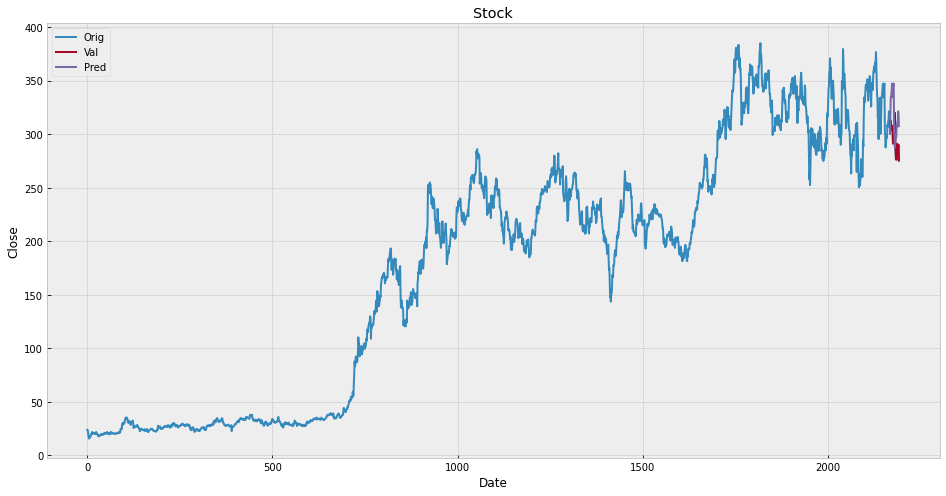

In [ ]:
#visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Stock')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


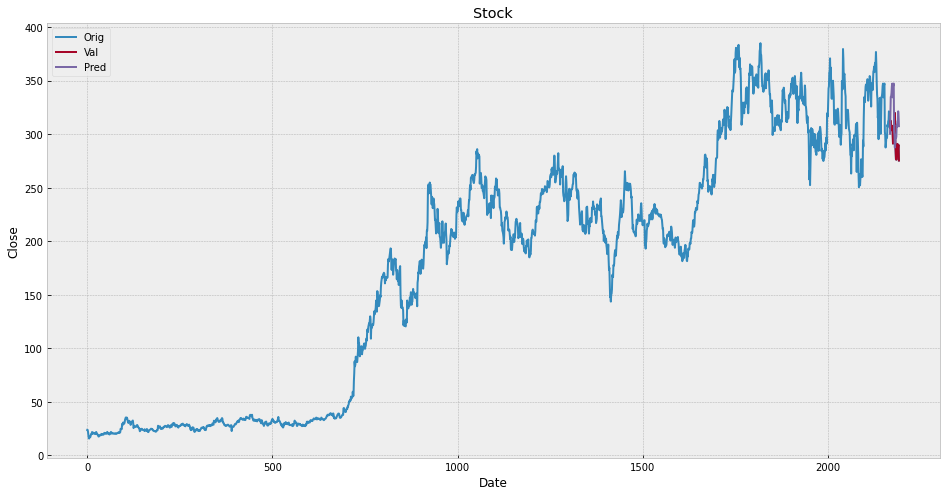

In [ ]:
#visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Stock')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()